# KB article "How to create a User Analysis using ZOS-API"

Source: "[How to create a User Analysis using ZOS-API](http://www.zemax.com/support/resource-center/knowledgebase/how-to-create-a-user-analysis-using-zos-api)," Thomas Aumeyr, Nov. 2015

In [1]:
from __future__ import print_function, division
import os
import numpy as np
import matplotlib.pyplot as plt
import pyzos.zos as zos

In [2]:
%matplotlib inline

In [3]:
# instantiate an optical system
osys = zos.OpticalSystem()

In [4]:
# Load the zemax lens file into the optical system
sdir = osys.pTheApplication.pSamplesDir
lens = 'Double Gauss 28 degree field.zmx'
lensfile = os.path.join(sdir, 'Sequential', 'Objectives', lens)
osys.LoadFile(lensfile, False)

True

In [5]:
# editors
lde = osys.pLDE
mfe = osys.pMFE

In [6]:
# add 3 operands to MFE
operands = []
for i in range(3):
    operands.append(mfe.AddOperand())

In [7]:
# set operand parameters
frequencies = [30, 40, 50]
for oper, freq in zip(operands, frequencies):
    _ = oper.ChangeType(zos.Const.MeritOperandType_MTFS)
    oper_samp = oper.GetOperandCell(zos.Const.MeritColumn_Param1)
    oper_samp.pIntegerValue = 2
    oper_freq = oper.GetOperandCell(zos.Const.MeritColumn_Param4)
    oper_freq.pDoubleValue = freq

Within the loop, we will vary the thickness of the surface 6 and run QuickFocus before computing the MTF.

In [8]:
# loop to get the MTF values as a function of thickness of surf 6
mtfs30 = []
mtfs40 = []
mtfs50 = []
surf6 = lde.GetSurfaceAt(6)
thickness = surf6.pThickness + np.linspace(-1, 1, 201)
quick_focus = osys.pTools.OpenQuickFocus()
quick_focus.pUseCentroid = True

for thick in thickness:
    surf6.pThickness = thick
    quick_focus.RunAndWaitForCompletion()
    mfe.CalculateMeritFunction()
    mtfs30.append(operands[0].pValue)
    mtfs40.append(operands[1].pValue)
    mtfs50.append(operands[2].pValue)
    
quick_focus.Close()

True

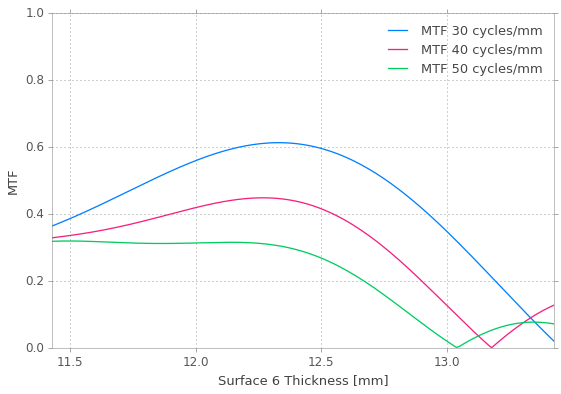

In [9]:
# plot
fig, ax = plt.subplots(1,1, figsize=(9, 6))
ax.plot(thickness, np.array(mtfs30), label='MTF 30 cycles/mm')
ax.plot(thickness, np.array(mtfs40), label='MTF 40 cycles/mm')
ax.plot(thickness, np.array(mtfs50), label='MTF 50 cycles/mm')
ax.set_xlabel('Surface 6 Thickness [mm]')
ax.set_ylabel('MTF')
ax.set_xlim(thickness[0], thickness[-1])
ax.set_ylim(0, 1)
ax.grid()
ax.legend()
plt.show()

In [10]:
osys.Close(False)
osys.pTheApplication.CloseApplication()